In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import time

In [ ]:
# rosenbrock banana - test for levelsets

In [2]:
def sigmoid(t):
    if t < -700:
        return 0
    else:
        return (1 + np.e**(-t))**(-1)
def h_cost(X):
    return - np.log(sigmoid(1 + X**2 + X**3))

def lin():
    """
    Where A is an array of inputs for 'x'
    """
    li = [0]*100
    Y = [0]*100
    O = [0]*100
    for i in range(-9,91):
        li[i] = random.random()*100
        y = h_cost(i)
        Y[i] = y + np.random.normal(0,3) #adding noise
        O[i] = [li[i],Y[i]]
    return O

A = lin()

xVec = np.random.rand(2,1)*100
temp = np.matmul(A,xVec)
b = temp + np.random.normal(0,100,temp.shape)

def f(X, a=A,B=b):
    return 0.5*np.linalg.norm(np.matmul(a,x)-B)**2

def f_grad(X,a=A, B=b):
    return np.matmul(np.array(A).transpose(),(np.matmul(a,X)-B))

def GD(x, lamb, gradient_function):
    x1 = x - lamb*gradient_function(x)
    return x1

In [4]:
A

[[13.863215731298206, -1.4500379065737439],
 [61.94060463060453, 1.9706554645673355],
 [98.92739279645254, -6.537890116651467],
 [64.93728433452158, 0.9422333264852787],
 [21.676698309630726, -9.989083706417892],
 [47.8144611687359, -19.484929003824632],
 [42.535331476402746, -12.501860477169428],
 [14.328682451378905, -12.008770829259506],
 [77.0929131700409, -14.141665935085676],
 [5.890460266013708, -11.809020769278685],
 [18.47296354384215, -10.730055690138535],
 [50.27408095946192, -14.428909077396424],
 [98.08498958209323, -16.338411100821798],
 [52.66808566815061, -17.019303813211497],
 [95.2785439508424, -19.936769055531204],
 [70.60551236045544, -16.022917978067206],
 [21.501320483057974, -17.186958114664233],
 [70.57834215893352, -15.67516686564063],
 [1.611611430778781, -15.274093734820514],
 [14.035736403999321, -20.064790894730578],
 [12.575115976768004, -16.5490721601887],
 [28.536458458498903, -22.96306471666703],
 [87.88597348500336, -18.56819341286157],
 [7.21583013418

<function matplotlib.pyplot.show(close=None, block=None)>

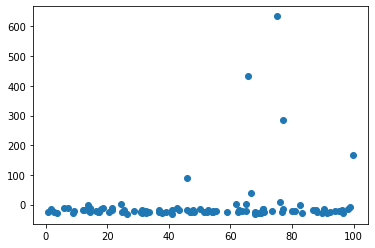

In [3]:
aaa = [0]*100
bbb = [0]*100
for i in range(100):
    aaa[i] = A[i][0]
    bbb[i] = A[i][1]
plt.scatter(aaa, bbb)
plt.show

\begin{align}
\text{min } \mathbf{x}: \\
f(\mathbf{x}) &= \frac{1}{2} \|A \mathbf{x} - b \|^2\\
\nabla f(\mathbf{\mathbf{x}}) &= A^T(A \mathbf{x} -b)\\
{\mathbf{x}}_{k+1} &= \mathbf{x}_k - \lambda_k \nabla f(\mathbf{x}_k)
\end{align}


Vanilla Gradient Descent

These are implemented as:

23692.92324657521
13369.611360284758
7988.353127491552
4773.047171668281
2851.899376427154
1704.0120830030883
1018.1485374356078
608.3445385289966
363.4863322487287
217.18336462961804
129.76722833048106
77.53601928598768
46.32783148721341
27.680915141537145
16.5393682045151
9.882285293517423
5.904673104738291
3.528046747312928
2.1080106609900233
1.2595379989358222
0.7525749275747285
0.44966410077614277
0.2686746471640247
0.16053330846570169
0.09591877619487642
0.05731154296411451
0.034243692092429986
0.02046063214202704
0.012225243296647722
0.007304591982996522
0.004364499317614438
0.0026077912250395286
0.0015581574364865497
----------------------


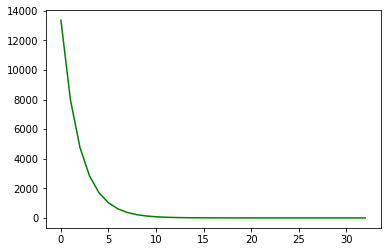

[[32.77140301]
 [67.31367233]]
[[-9.28813999e-04]
 [-6.37603347e-05]]
Iterations: 34
Time taken: 0.17453312873840332
Lambda:  1.3256449928312805e-06


In [112]:
current = time.time()
X = []
L = np.max(np.linalg.svd(np.matmul(A,np.array(A).transpose()))[1])
lamb = 1/L
x = xVec
gr = []
count = 1
while np.linalg.norm(f_grad(x)) > 1e-3:
    print(np.linalg.norm(f_grad(x)))
    x1 = GD(x,lamb,f_grad)
    x = x1
    X.append(f(x))
    gr.append(np.linalg.norm(f_grad(x)))
    count += 1
print('----------------------')
plt.plot(range(len(gr)), gr, c='g')
plt.show()
print(x)
print(f_grad(x))
print('Iterations:', count)
print('Time taken:', time.time() - current)
print('Lambda: ', lamb)

Adaptive Gradient Descent

lambda initial:  0.2321752568187928
theta intial: 100000
x intial: [[32.69858744]
 [67.29832367]]
x1 intial: [[5091.77671778]
 [2227.33194271]]
min1: 73.42062988858866
min2: 1.3188558760169915e-06
lambda:  1.3188558760169915e-06
x1: [[32.72732519]
 [67.3105936 ]]
x: [[5091.77671778]
 [2227.33194271]]
theta: 5.680432506407549e-06
Gradient Norm: 13415.79514256153
min1: 1.3188596218475667e-06
min2: 1.3188558760169913e-06
lambda:  1.3188558760169913e-06
x1: [[3139.58209377]
 [ 289.86437096]]
x: [[32.72732519]
 [67.3105936 ]]
theta: 0.9999999999999999
Gradient Norm: 945744746.8856435
min1: 1.8651438666786784e-06
min2: 1.6467294737663794e-06
lambda:  1.6467294737663794e-06
x1: [[32.74936091]
 [67.31217209]]
x: [[3139.58209377]
 [ 289.86437096]]
theta: 1.248604569848513
Gradient Norm: 6708.028263756279
min1: 2.469328126531815e-06
min2: 1.6467294737663794e-06
lambda:  1.6467294737663794e-06
x1: [[1586.68305546]
 [ 171.73330355]]
x: [[32.74936091]
 [67.31217209]]
theta: 1.0
Gradient Norm: 47287

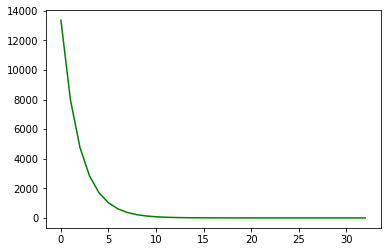

x value [[32.77177346]
 [67.31369776]]
Gradient [[112.47715907]
 [  7.72099286]]
Iterations: 50
Time taken: 0.2932307720184326


In [113]:
current = time.time()
X =[]
lam = random.random()
print('lambda initial: ',lam)
theta = 100000
print('theta intial:', theta)
x = xVec
print('x intial:', x)
x1 = GD(x,lam,f_grad)
print('x1 intial:', x1)
gr2 = []
count =1
while np.linalg.norm(f_grad(x1)) > 1e-3:
    lam_prev = lam
    min1 = np.sqrt(1 + theta)*lam
    min2 = (np.linalg.norm(x1 - x))/(2*np.linalg.norm(f_grad(x1) - f_grad(x)))
    print('min1:', min1)
    print('min2:', min2)
    lam = np.min([min1, min2])
    print('lambda: ',lam)
    temp = x1
    x1 = GD(x, lam, f_grad)
    print('x1:', x1)
    x = temp
    print('x:', x)
    theta = (lam/lam_prev)
    print('theta:', theta)
    count += 1
    grad = np.linalg.norm(f_grad(x1))
    print('Gradient Norm:', grad)
    gr2.append(grad)
print('----------------------')
plt.plot(range(len(gr)), gr, c='g')
plt.show()
print('x value', x)
print('Gradient', f_grad(x))
print('Iterations:', count)
print('Time taken:', time.time() - current)

In [28]:
print('Generating x:', xVec)

Generating x: [[86.6176915 ]
 [71.23064329]]


In [39]:
np.e

2.718281828459045

In [44]:
np.log(np.e)

1.0

In [40]:
def sigmoid(x):
    return 1/(1 + np.e**(-x))
def h_cost(X):
    return - np.log(sigmoid(1 + X**2 + X**3))

In [41]:
sigmoid(x)

array([[0.99993949],
       [0.99917529]])

In [51]:
h_cost(A)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'